In [2]:
import sys
sys.path.append('../..')
#from data_engine import DataEngine
from utilities.backtesting import *
from utilities.backtesting2 import *
from utilities.get_data import get_historical_from_db
import pandas as pd
import ta
import ccxt
import json
f = open('/Users/gauthiermarre/Desktop/Crypto Robot/backtest_tools/database/coin_list.json',)
pairJson = json.load(f)
f.close()

In [3]:
pairList = pairJson['hitbtc_2018']

In [4]:
# --- Load Data ---
tf = "1h"
dfList = []

for i in range(len(pairList)) :
    dfList.append(get_historical_from_db(ccxt.binance(),pairList[i],tf,path="../../database/"))


In [5]:
dfList[0]

,open,high,low,close,volume
date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2022-05-01 08:00:00,37970.27,38058.46,37924.13,38031.51,805.638630
2022-05-01 09:00:00,38031.51,38056.59,37866.62,37974.54,764.616210
2022-05-01 10:00:00,37974.55,38094.16,37951.64,38026.25,808.546410


In [6]:
# -- Indicator variable --
aoParam1 = 6
aoParam2 = 22
stochWindow = 14
willWindow = 14

# -- Drop all columns we do not need --
for df in dfList:
    # -- Drop all columns we do not need --
    df.drop(columns=df.columns.difference(['open','high','low','close','volume']), inplace=True)

    # -- Indicators, you can edit every value --
    df['AO'] = ta.momentum.awesome_oscillator(df['high'],df['low'],window1=aoParam1,window2=aoParam2)
    
    df['EMA100'] =ta.trend.ema_indicator(close=df['close'], window=100)
    df['EMA200'] =ta.trend.ema_indicator(close=df['close'], window=200)

    df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow)

    df['WillR'] = ta.momentum.williams_r(high=df['high'], low=df['low'], close=df['close'], lbp=willWindow)

print("Indicators loaded 100%")
dfList[0]

Indicators loaded 100%


,open,high,low,close,volume,AO,EMA100,EMA200,STOCH_RSI,WillR
date,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-05-01 08:00:00,37970.27,38058.46,37924.13,38031.51,805.638630,-199.161894,38800.873029,39233.489550,0.964982,-42.017041
2022-05-01 09:00:00,38031.51,38056.59,37866.62,37974.54,764.616210,-165.377803,38784.509998,39220.962689,0.917229,-45.563423
2022-05-01 10:00:00,37974.55,38094.16,37951.64,38026.25,808.546410,-132.524697,38769.494949,39209.075000,1.000000,-35.002946


In [7]:
dfTestList = []
for df in dfList:
    dfTestList.append(df.loc['2018-01-01':])

# -- Starting value --
startingBalance = 1000
makerFee = 0
takerFee = 0.0007

# -- Rules --
StopLossActivation = True
takeProfitActivation = True
showLog = False

# -- Hyper parameters --
stochOverBought = 0.8
stochOverSold = 0.2
SlPct = 0.015
TpPct = 0.15
willOverSold = -85
willOverBought = -10
maxPositions = 3

# -- Trade Functions --

# -- Condition to BUY market --
def buyCondition(row, previousRow=None):
    if (
        row['AO'] >= 0
        and previousRow['AO'] > row['AO']
        and row['WillR'] < willOverSold
        and row['EMA100'] > row['EMA200']
    ):
        return True
    else:
        return False

# -- Condition to SELL market --
def sellCondition(row, previousRow=None):
    if (
        (row['AO'] < 0
        and row['STOCH_RSI'] > stochOverSold)
        or row['WillR'] > willOverBought
    ):
        return True
    else:
        return False

# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
stopLoss = [0] * len(pairList)
takeProfit = [5000000] * len(pairList)
walletCoinArray = [0] * len(pairList)
walletUsdArray = [0] * len(pairList)
activePositions = 0
lastIndex = dfTestList[0].index.values[1]

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'symbol','position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet'])

# # -- Iteration on all your price dataset (df) --
for index, row in dfTestList[0].iterrows():
    # -- Check if you have one coin in your wallet --
    if (walletCoinArray.count(0) == len(walletCoinArray)) == False:
        # -- Iteration on all coin (upgrade possible: only check coin in your wallet) --
        for i in range(0,len(dfTestList)):
            # -- Check if you have more than 0 coin --
            if walletCoinArray[i] != 0:
                try:
                    actualRow = dfTestList[i].loc[index]
                    previousRow = dfTestList[i].loc[lastIndex]
                    # -- Stop Loss --
                    if actualRow['low'] < stopLoss[i] :
                        sellPrice = stopLoss[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Stop Loss',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Take Profit --
                    elif actualRow['high'] > takeProfit[i] :
                        sellPrice = takeProfit[i]
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = makerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

                        # -- Add the trade to dfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Take Profit',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)

                    # -- Sell Market --
                    elif sellCondition(actualRow,previousRow):
                        sellPrice = actualRow['close']
                        usd = usd + walletCoinArray[i] * sellPrice
                        fee = takerFee * walletCoinArray[i] * sellPrice
                        usd = usd - fee
                        # -- Set coin and equivalent usd to 0 after sold position --
                        walletCoinArray[i] = 0
                        walletUsdArray[i] = 0
                        activePositions -= 1

                        # -- LOG --
                        if showLog:
                            print("Sell", pairList[i],"at", sellPrice, '$ the', index)

                        # -- Add the trade to DfTrades to analyse it later --
                        myrow = {
                            'date': index,
                            'symbol': pairList[i],
                            'position': "Sell",
                            'reason': 'Sell Market Order',
                            'price': sellPrice,
                            'frais': fee,
                            'fiat': usd,
                            'coins': 0,
                            'wallet': sum(walletUsdArray) + usd
                        }
                        dfTrades = dfTrades.append(myrow, ignore_index=True)
                except:
                    pass
    # -- Buy market order --
    # -- Check if you can open a new position --
    if activePositions < maxPositions:
        # -- Check buy condition for each coin of list --
        for i in range(0,len(dfTestList)):
            try:
                actualRow = dfTestList[i].loc[index]
                previousRow = dfTestList[i].loc[lastIndex]
                # -- Buy condition --
                if buyCondition(actualRow, previousRow) and activePositions < maxPositions and walletCoinArray[i]==0 :
                    buyPrice = actualRow['close']
                    # -- Define size of the position --
                    usdMultiplier = 1/(maxPositions-activePositions)
                    fee = takerFee * usd * usdMultiplier
                    usd = usd - fee
                    coin = (usd * usdMultiplier) / buyPrice
                    usd = usd - (usd * usdMultiplier)
                    # -- Set coin and equivalent usd to size of position after open position --
                    walletCoinArray[i] = coin
                    walletUsdArray[i] = coin * actualRow['close']
                    activePositions += 1
                    # -- Create a Stop Loss --
                    if StopLossActivation:
                        stopLoss[i] = buyPrice - SlPct * buyPrice
                    # -- Create a Take Profit --
                    if takeProfitActivation:
                        takeProfit[i] = buyPrice + TpPct * buyPrice

                    # -- LOG --
                    if showLog:
                        print("Buy", pairList[i],"at", buyPrice, '$ the', index)

                    # -- Add the trade to dfTrades to analyse it later --
                    myrow = {
                        'date': index,
                        'symbol': pairList[i],
                        'position': "Buy",
                        'reason': 'Buy Market Order',
                        'price': buyPrice,
                        'frais': fee,
                        'fiat': usd,
                        'coins': coin,
                        'wallet': sum(walletUsdArray) + usd
                    }
                    dfTrades = dfTrades.append(myrow, ignore_index=True)
            except:
                pass

    # -- Keep last index to define last row --            
    lastIndex = index

print("Final wallet", sum(walletUsdArray) + usd)


Final wallet 837.2421649978222


In [8]:

BTobject = Backtesting()
newDf = BTobject.multi_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTestList[0], pairList=pairList, timeframe=tf)

Trading Bot on : 24 coins | Timeframe : 1h
Period : [2018-01-01 00:00:00] -> [2022-05-01 12:00:00]
Starting balance : 999.7666666666667 $

----- General Informations -----
Final balance : 837.24 $
Performance vs US Dollar : -16.26 %
Bitcoin Buy and Hold Performence : 180.56 %
Performance vs Buy and Hold : -70.15 %
Best trade : +5.0 %, the 2019-12-12 11:00:00
Worst trade : -0.53 %, the 2022-03-23 04:00:00
Worst drawDown : - 43.74 %
Total fees :  1252.14 $

----- Trades Informations -----
Total trades on period : 3296
Number of positive trades : 1654
Number of negative trades :  1642
Trades win rate ratio : 50.18 %
Average trades performance : 0.02 %
Average positive trades : 0.5 %
Average negative trades : -0.46 %

----- Trades Reasons -----
Buy Market Order     3296
Sell Market Order    1786
Sell Stop Loss       1504
Sell Take Profit        6
Name: reason, dtype: int64

----- Pair Result -----
---------------------------------------------------------------------------------------------

----- 2018 Performances: -5.73% -----


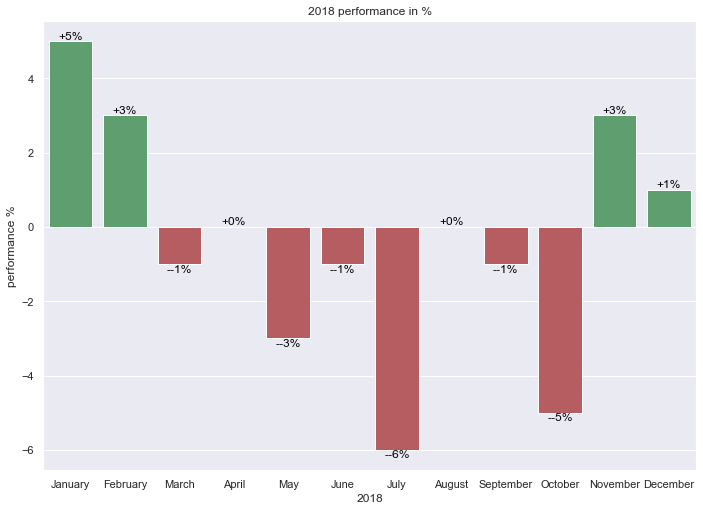

----- 2019 Performances: 8.82% -----


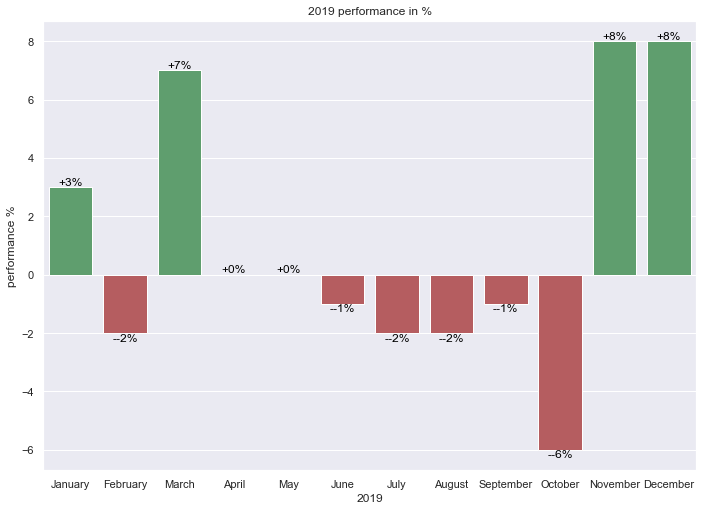

----- 2020 Performances: 19.05% -----


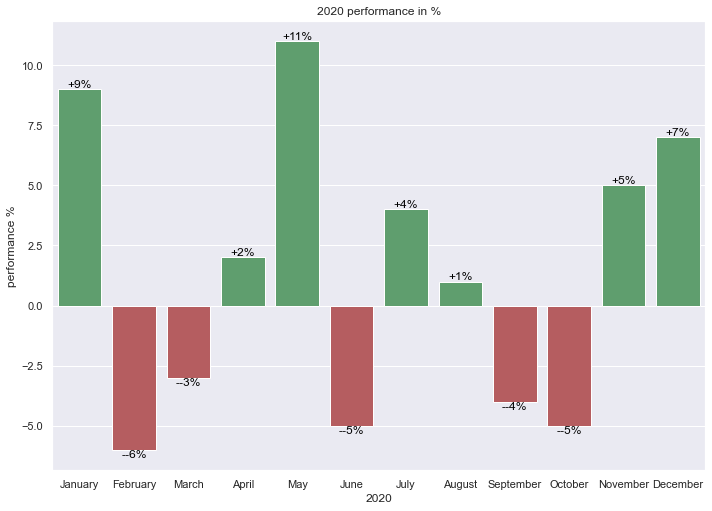

----- 2021 Performances: -22.85% -----


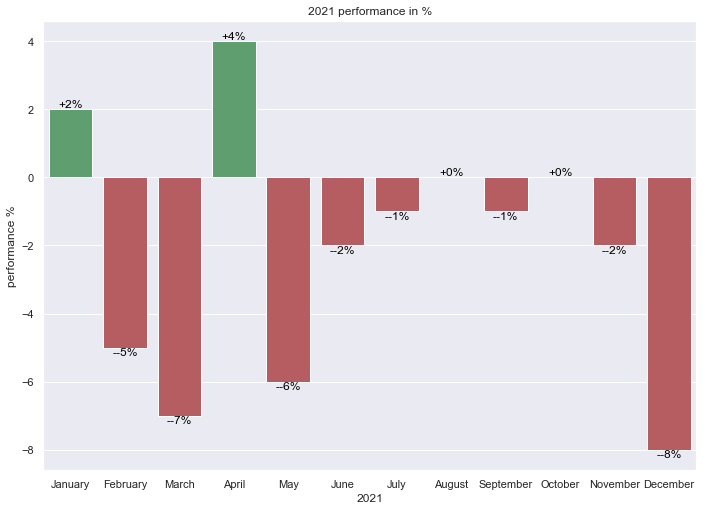

----- 2022 Performances: -11.05% -----


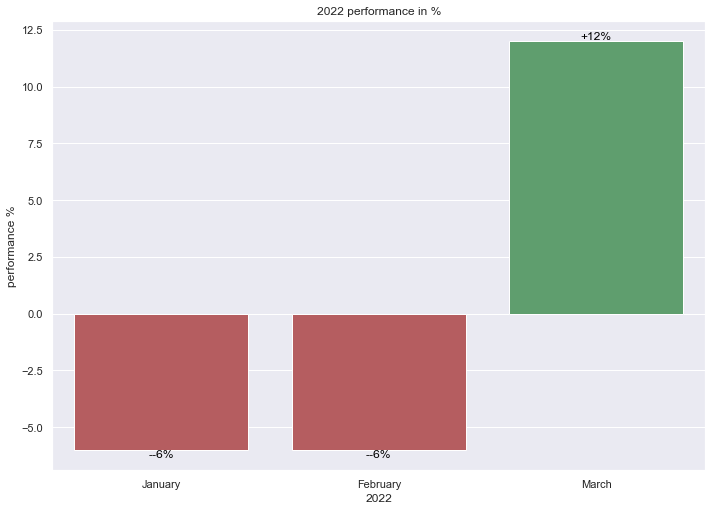

In [9]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)

/var/folders/8y/1flz8jkn3l302mw2j9pnflv80000gn/T/ipykernel_4058/3056460112.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])



----- Plot -----


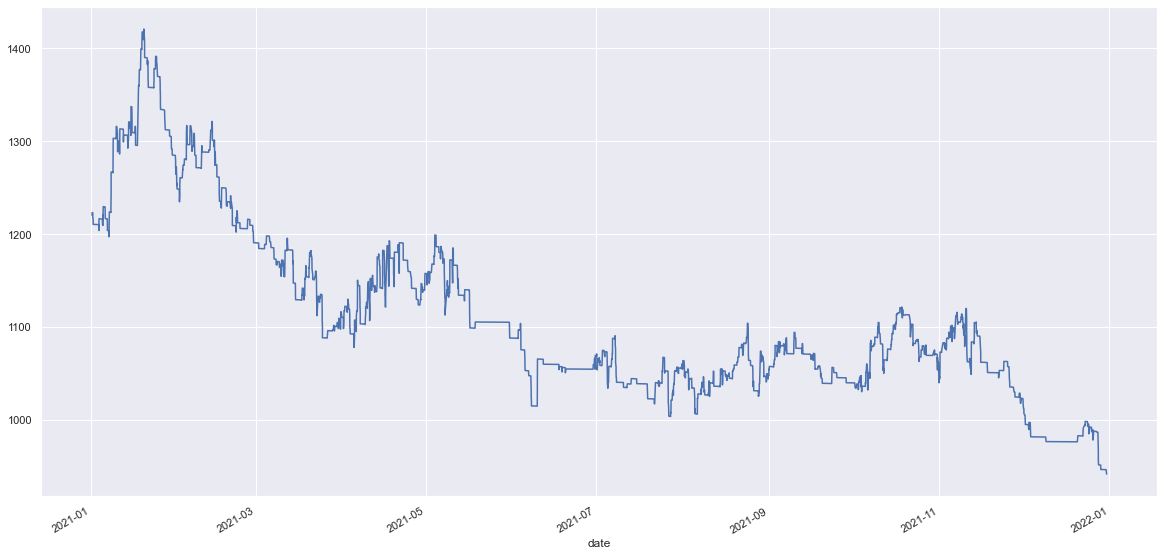

In [10]:
BTobject.plot_wallet_evolution(dfTrades=newDf['2021'])

In [11]:
dfTrades.iloc[-10:]

,date,symbol,position,reason,price,frais,fiat,coins,wallet
6582,2022-04-26 15:00:00,XMR/USDT,Sell,Sell Stop Loss,240.438500,0.000000,564.265500,0.000000,850.895293
6583,2022-04-26 16:00:00,ZEC/USDT,Sell,Sell Stop Loss,156.812000,0.000000,846.595846,0.000000,846.595846
6584,2022-04-28 12:00:00,DOGE/USDT,Buy,Buy Market Order,0.138600,0.197539,564.265538,2035.589964,846.398307
6585,2022-04-28 12:00:00,ZRX/USDT,Buy,Buy Market Order,0.866100,0.197493,282.034022,325.636788,846.200814
6586,2022-04-28 13:00:00,DOGE/USDT,Sell,Sell Stop Loss,0.136521,0.000000,559.934800,0.000000,841.968822
6587,2022-04-28 13:00:00,ZRX/USDT,Sell,Sell Stop Loss,0.853108,0.000000,837.738312,0.000000,837.738312
6588,2022-04-28 13:00:00,ZRX/USDT,Buy,Buy Market Order,0.852400,0.195472,558.361893,327.523401,837.542840
6589,2022-04-28 14:00:00,ZRX/USDT,Sell,Sell Stop Loss,0.839614,0.000000,833.355126,0.000000,833.355126
6590,2022-04-29 10:00:00,DOGE/USDT,Buy,Buy Market Order,0.136300,0.194450,555.440451,2037.565850,833.160676
6591,2022-04-29 12:00:00,DOGE/USDT,Sell,Sell Market Order,0.138400,0.197399,837.242165,0.000000,837.242165
